In [1]:
# import
import numpy as np
import matplotlib.pyplot as plt
import random
from collections import Counter

# Histograms and the binomial distribution

Histograms provide a visual representation of the empirical distribution of a data set.

In this lab, we will simulate numerical experiments with random number generators to illustrate how histograms can be used to infer the true probability distribution of our random variables and the impact of finite data sets on our estimates.

For simplicity, we will start with an experiment with discrete random variables (the roll of a dice). In the second part of the lab, we will move on to continuous random variables.

## Part 1: Discrete Random Variables : The roll of a dice

Consider a discrete random variable \(Y\) that can take any of the possible values in $\{y_1,\ldots,y_n\}$. To estimate the probability of each value, $p_n$, we can count the frequency with which each $y_i$ occurs in our data set. This intuitive idea is justified by the law of large numbers, but we can easily illustrate it here by modeling the counting process with the binomial distribution.

For clarity, we assume that the true probability of observing $y_i$ is $p_i$.

The process of checking whether our random variable $y$ matches a given value $y_i$ (e.g., a particular digit in a die) can be treated as a Bernoulli trial assigned to the random variable $X_i$, where "success" ($x_i=0$) means that $Y=y_i$, and "failure" ($x_i=1$) means that $Y|\neq y_i$. Since we are describing histograms, we refer to the event $Y=y_i$, as $Y$ being in bin $i$.

In a set of $N$ trials (e.g., $N$ dice rolls), the number of times we observe $Y=y_i$ is also a random variable

$$K_i=\sum_{n=1}^N X_{i,n}.$$

As we discussed in class, $K_i$ follows a binomial distribution:
$$ P(K_i=k) =B(k,p,N)= \binom{N}{k} p_i^k (1-p_i)^{N-k} $$

**Exercises (analytical)**
1. Calculate the expected number of observations in bin \(x_i\) as a function of $p_i$ and $N$.
2. Determine the expected standard deviation (or error) from this theoretical mean for Bin $i$.

In [2]:
mu=N*p_i

sigma2=np.sqrt(N*p_i*(1-p_i))

NameError: name 'N' is not defined

### Counting repetitions

Our numerical experiment will mimic a dice rolling experiment. To do this, we will randomly generate dice numbers with a uniform distribution, count how many times we get each of the 6 digits, and try to estimate their respective probabilities from analysis of the data.

Now let's count how many times I observe a particular outcome in a series of $N$ trials.

**Exercise (numerical)**

3. We simulate rolling a die by uniformly generating a random number between 1 and 6, i.e., the probability of getting every possible digit is $p=1/6$. Prepare a function that returns the result of a set of $N$ trials

In [3]:
# We generate N random numbers, each corresponding to the number displayed after a die roll
# the function random.randint(A,B) generates a random number between A and B with uniform probability


def throw_dice(N): # roll N dices
    X = [np.random.randint(1,7) for i in range(N)]
    
    return X


# we show the series of numbers obtained with each throw of the dice
print(throw_dice(10))

[6, 6, 6, 5, 6, 6, 2, 1, 1, 3]


4. Now let's count how many times I observe a given outcome in a set of $N$ trials. To do this, follow the steps below:

    a. Define a function to count how many times each number occurs

In [4]:
def count_elements(X,Nmax=6):
    count=np.zeros(Nmax)
    
    
    # 计算每个数字出现的次数 Count how many times each number occurs
    for i in X:
        count[i-1]+=1
    
    return count.astype(int) # return the number of times we find a 1, a 2, ...

N=10

#Generate a sequences of numbers

X=throw_dice(N)
#we show the sequence
print(X)

# Print the number of times we get each number
print([str(i+1)+":"+str(c) for i,c in enumerate(count_elements(X))])

[1, 4, 5, 4, 1, 4, 4, 4, 5, 3]
['1:2', '2:0', '3:1', '4:5', '5:2', '6:0']


b. Plot the results on a bar graph and compare them to the theoretical mean and standard deviation. 


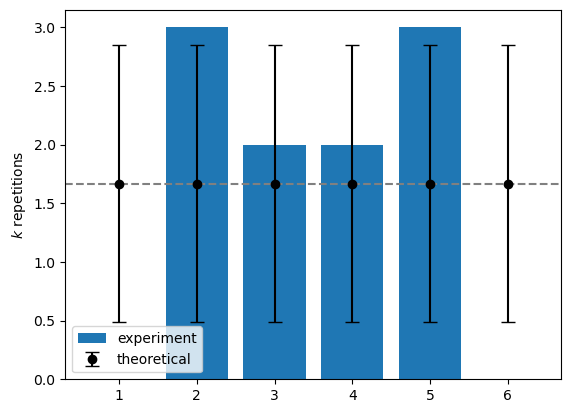

In [5]:
p=1/6
N=10


mean=[p*N for i in range(6)]  # theoretical mean for each number
error=[np.sqrt(p*(1-p)*N)for i in range(6)] # theoretical standard deviation

# we plot the counts of each number
plt.bar(np.arange(1,7),count_elements(throw_dice(N)), capsize=5,label='experiment') 

#we compare with the theoretical expectation
plt.errorbar(np.arange(1,7),mean,yerr=error,fmt='o', capsize=5,color='black',label='theoretical')
plt.axhline(y=mean[0],ls='--',color='gray')

plt.ylabel(r'$k$ repetitions')
plt.legend()
plt.show()

c. How does this change if you increase the number of die rolls per experiment?


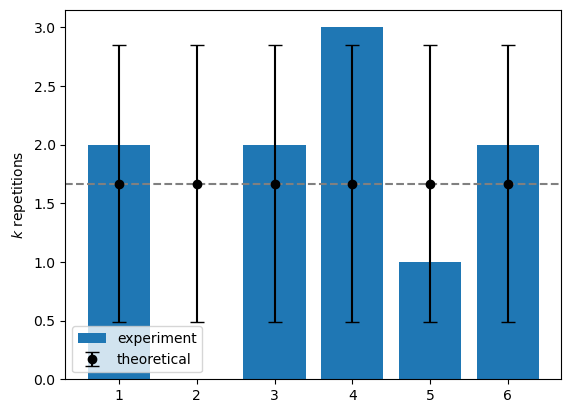

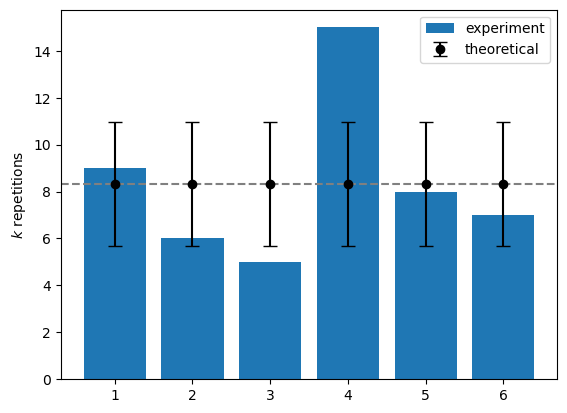

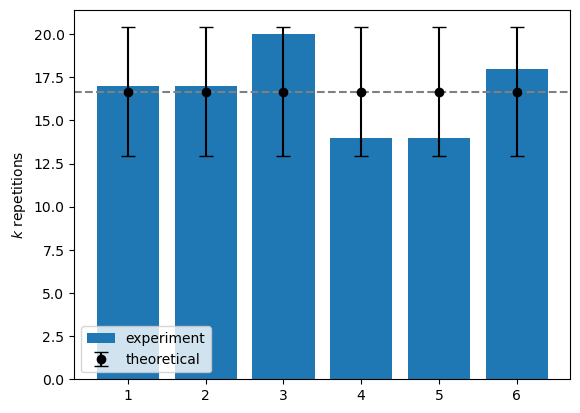

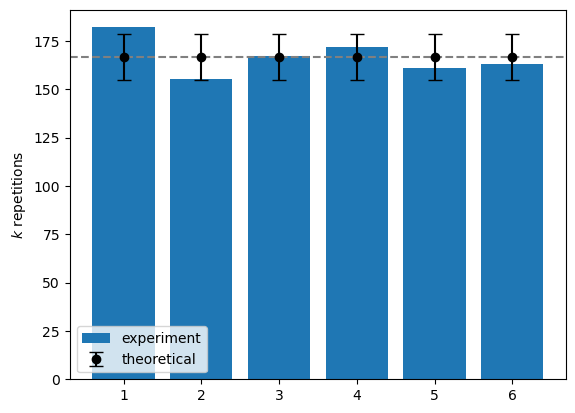

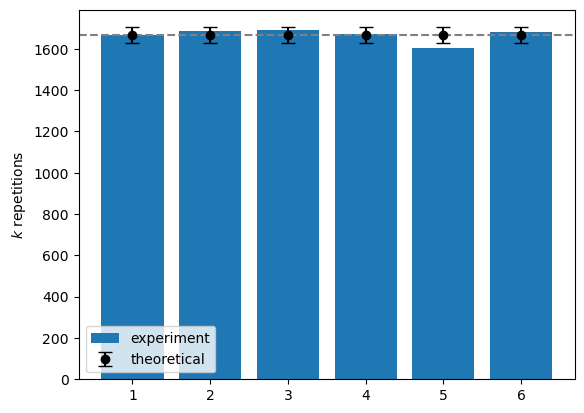

In [6]:
p=1/6.

for N in [10,50, 100, 1000, 10000]:
    #redo the plot above
    mean=[p*N for i in range(6)]  # theoretical mean for each number
    error=[np.sqrt(p*(1-p)*N)for i in range(6)] # theoretical standard deviation

    # we plot the counts of each number
    plt.bar(np.arange(1,7),count_elements(throw_dice(N)), capsize=5,label='experiment') 

    #we compare with the theoretical expectation
    plt.errorbar(np.arange(1,7),mean,yerr=error,fmt='o', capsize=5,color='black',label='theoretical')
    plt.axhline(y=mean[0],ls='--',color='gray')

    plt.ylabel(r'$k$ repetitions')
    plt.legend()
    plt.show()
    
    # redo the plot above

You can repeat the experiment several times and you will get different results. Most likely, you will get several counts that do not agree the expected value and the expected variation. Does this mean that there is a problem with the random number generator? The general answer is: it depends.

If we know the theoretical distribution, the binomial distribution, we can calculate the probability that it will not match the error

$$(\mu-\sigma > k > \mu+\sigma)=1-P(\mu-\sigma < k < \mu+\sigma)=1-\sum_{k=[\mu-\sigma k]}^{[\mu+\sigma k]} B(k,N,p)$$

d. For the above values of $N$, estimate the probability that the number of hits within the error is inconsistent with the theoretical values. How many of our counts do we expect to be inconsistent with the expected values? 

In [7]:
from scipy.stats import binom # we can compute the Binomial distribution 
                              #using the code binom.pmf(k, N, p)


for N in [10, 100, 1000,10000]:
    
    sum_prob=0
    
    p=1/6
    mean=N*p
    error=np.sqrt(N*p*(1-p))
    
    min_k=mean-error
    max_k=mean+error
    print(min_k,max_k)
    
    for k in range(int(min_k),int(max_k)+1):
        sum_prob+=binom.pmf(k, N, p)
        
    prob_out=1-sum_prob    
    print(N,': prob=',prob_out, 'out of six:',prob_out*6)

0.48815536468908727 2.8451779686442458
10 : prob= 0.22477320212874063 out of six: 1.3486392127724438
12.939886704167016 20.393446629166313
100 : prob= 0.2296070691014711 out of six: 1.3776424146088266
154.88155364689086 178.45177968644245
1000 : prob= 0.28905097532665147 out of six: 1.7343058519599088
1629.39886704167 1703.934466291663
10000 : prob= 0.3143241520534751 out of six: 1.8859449123208505


### Normalized histogram 

Instead of wondering about how often the die gives a certain number as a result, let us use it to estimate the frequency with which we get each of the numbers, which can be used as an approximation for the real probability $p_n$. The frequency is nothing more than the number of success numbers in my bin divided by the total number of trials. In other words, we now want to describe the statistics of normalized random variable:

$Z_i=\frac{1}{N}\sum_{n=0}^N X_{i,n}=\frac{K_i}{N}$

where $X_i$ is the random variable corresponding to the Bernoilli trial of being in bin $i$.

5. Which is the theoretical mean and the expected standard deviaton of this new normalized variable?



In [8]:
mu=p_i  #mean

sigma2=np.sqrt((p_i*(1-p_i))/N)  #error

NameError: name 'p_i' is not defined

6. Compute the the empirical frequency of appearance of each of the 6 numbers and compare them with the expected value and expected standard deviation. How accurate is this estimation as $N$ grows?

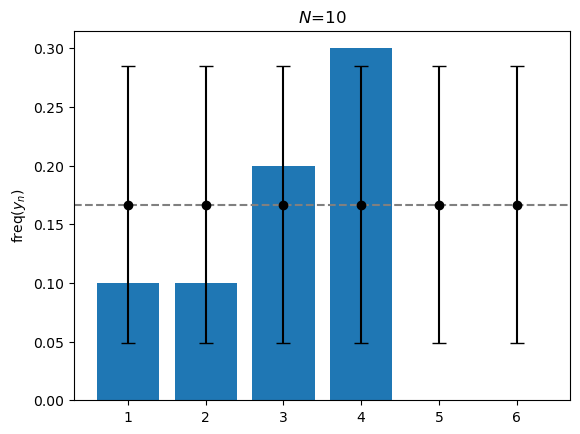

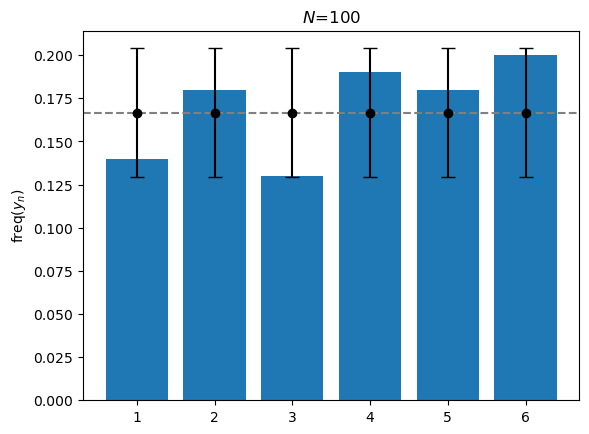

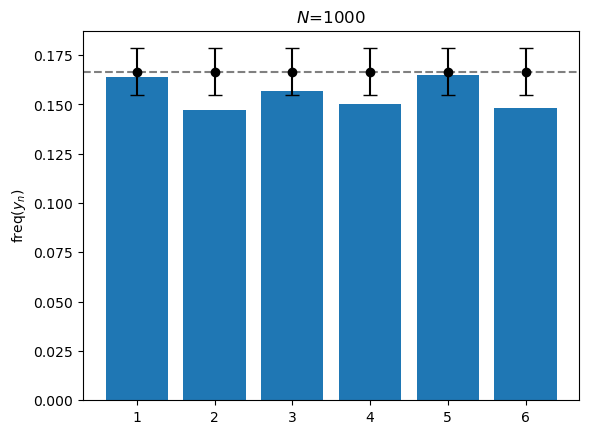

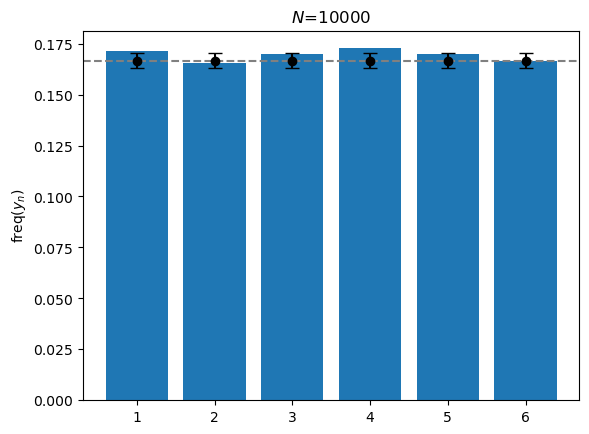

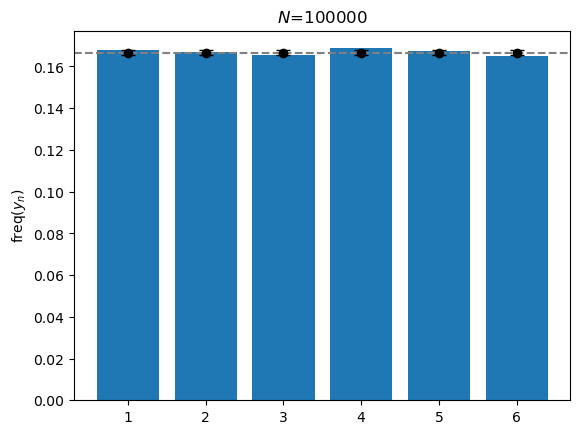

In [9]:
p=1/6.


for N in [10, 100, 1000, 10000,100000]:
    
    mean=[p for i in range(6)] # mean of Z
    error=[np.sqrt(p*(1-p)/N) for i in range(6)] # stardard deviation of Z
    
    #累计N次实验并计算每个数字出现的次数
    experiment=np.random.randint(1,7,size=(N,6))
    counts=np.sum(experiment==np.arange(1,7),axis=0)
    frequency=counts/N
    
    plt.bar(np.arange(1,7),frequency, capsize=5,label='experiment')
    plt.errorbar(np.arange(1,7),mean,yerr=error,fmt='o', capsize=5,color='black',label='theoretical')
    
    plt.title(r'$N$='+str(N))
    plt.axhline(y=1./6.,ls='--',color='gray')
    plt.ylabel(r'freq$(y_n)$')

    plt.show()

### Central limit theorem

The law of large numbers states that $\mu_Z \to p$ as $N\to\infty$, and that $\sigma^2_Z=\frac{\sigma_K^2}{N}$. This ensures that as the number of repetitions $N$ increases, our estimate of the probability of each event becomes finer and finer, but also that the expected fluctuations become smaller and smaller!

The central limit theorem goes even further: it states that $Z$ becomes Gaussian distributed $\mathcal{N}(\mu,\sigma^2)$ as the number of repetitions $N$ increases.

7. We have argued that $K_i=N Z_i$ (and hence $Z$) is distributed as a binomial distribution. We can verify that this is indeed the case by repeating our experiment (rolling $N$ dices) $T=1000$ times. And examine the histogram of the results with the binomial and normal distributions. Follow the steps below to do this:

 a. Now consider repeating the same experiment T times and record the number of repetitions you get for each of the numbers. Since all the numbers have the same probability, we can add up all the results in the same vector of values of k_i.

 b. Calculate a histogram of the ks obtained to estimate the frequency with which we obtain each value.
 Plot k/N against this frequency.

 c. Compare the shape of the histograms as you change $N$
 
 d. For each value of $N$ compare the empirical frequency with the binomial and the normal distribution


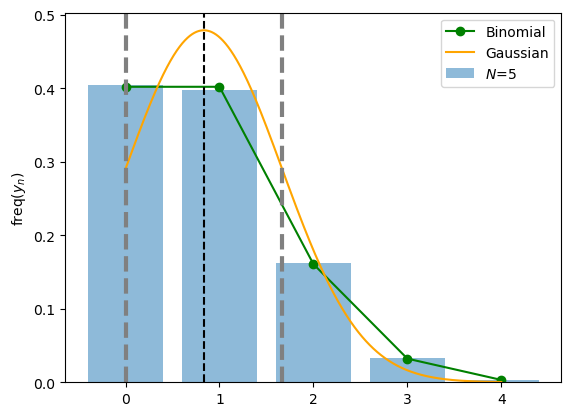

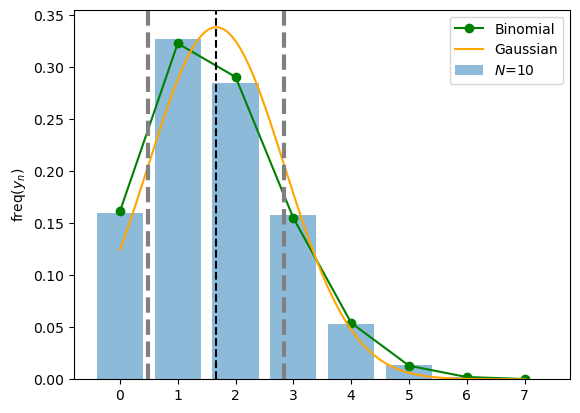

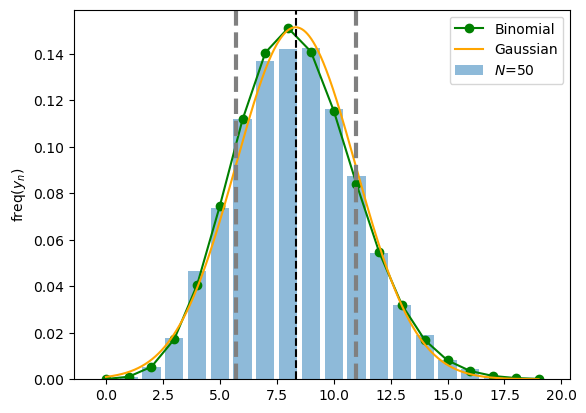

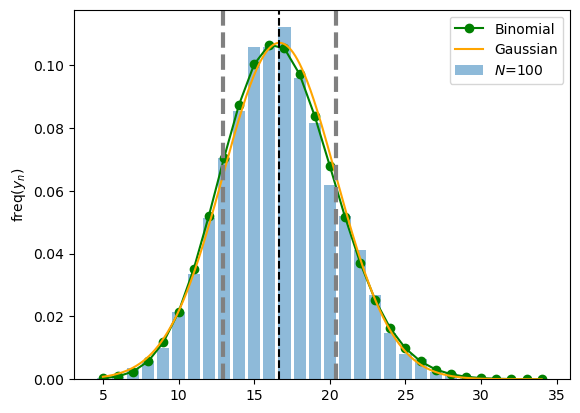

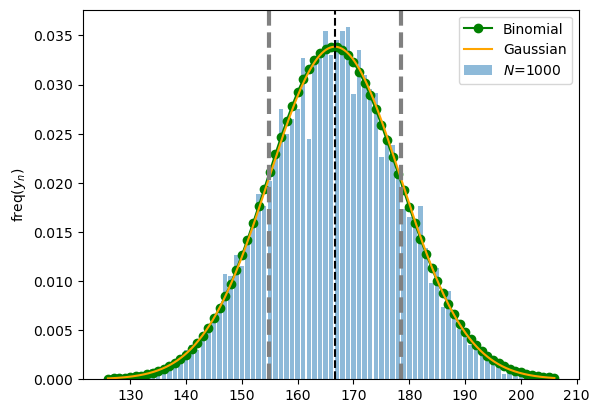

In [10]:
import scipy

def gauss(x,mu,sigma2):
    return 1./np.sqrt(2*np.pi*sigma2)*np.exp(-(x-mu)**2/(2*sigma2))

def count_elements_integer(X):
    Nmin=np.min(X)
    Nmax=np.max(X)
    
    count=np.zeros(Nmax-Nmin+1)
    for x in X:
        count[x-Nmin]+=1
    return np.arange(Nmin,Nmax+1),count.astype(int)

T=1000

for N in [5,10,50,100,1000]:

    Results=np.zeros((T,6))
    for t in range(T):
        #Simulate rolling N dices T times
        X=throw_dice(N)
        # Count the number of times each number occurs
        counts = count_elements(X)
        Results[t]=counts


    pk=Results.reshape(6*T).astype(int) # Since all numbers have the same probability, we can add up all the statistics of all them for the analysis
    
    
    myrange,myhist=count_elements_integer(pk)
    
    plt.bar(myrange,myhist/(6*T),label=r'$N$='+str(N),alpha=0.5)
    
    
    # binomial probability
    bi_prob=[]
    for k in myrange:
        bi_prob.append(scipy.stats.binom.pmf(k,N,1/6))  #计算二项分布概率质量函数（PMF）的函数，其中 k 表示成功次数，N 表示试验次数，p 表示每次试验成功的概率
    
    plt.plot(myrange,bi_prob,'o-',color='green',label='Binomial')
    
    x=np.linspace(myrange[0],myrange[-1],1000)
    mu=N*1/6
    sigma2=N*1/6*(5/6)
    plt.plot(x,gauss(x,mu,sigma2),color='orange',label='Gaussian')
    
    
    plt.axvline(x=mu,ls='--',color='black')
    plt.axvline(x=mu-np.sqrt(sigma2),ls='--',lw=3,color='gray')
    plt.axvline(x=mu+np.sqrt(sigma2),ls='--',lw=3,color='gray')
    plt.ylabel(r'freq$(y_n)$')
    plt.legend()
    
    
    plt.show()


### Area under the Gaussian

We want to estimate the probability of getting values at certain distance of the expected value.
For this it is convenient to use the **error function**:
 
$$erf(z)=\frac{2}{\sqrt{\pi}}\int_0^z e^{-x^2}$$

Using this function, the cumulative distribution function of the $\mathcal{N}(\mu,\sigma)(x)$ is
$$F(x | \mu, \sigma^2) = \frac{1}{2} \left[ 1 + \text{erf}\left(\frac{x - \mu}{\sigma\sqrt{2}}\right) \right]$$

And the area between two values $a$ and $b$
$$\text{Area between } a \text{ and } b = F(b | \mu, \sigma^2) - F(a | \mu, \sigma^2)$$


(i) Proof these two expressions

(ii) Estimate the probability of  $|k-\mu|>\sigma$, $|k-\mu|>2\sigma$, $|k-\mu|>3\sigma$

In [12]:
from scipy.special import erf

def gaussian_area(a, b):
    return 0.5 * (erf(b/np.sqrt(2)) - erf(a/np.sqrt(2)))

mu=0 #均值mean
sigma=1 #标准差SE

#计算|k-\mu|>\sigma的概率
prob1=1-gaussian_area(-sigma,sigma)

#计算|k-\mu|>\2sigma的概率
prob2=1-gaussian_area(-2*sigma,2*sigma)

#计算|k-\mu|>\3sigma的概率
prob3=1-gaussian_area(-3*sigma,3*sigma)

print("Probability |k-μ| > σ:", prob1)
print("Probability |k-μ| > 2σ:", prob2)
print("Probability |k-μ| > 3σ:", prob3)

Probability |k-μ| > σ: 0.31731050786291415
Probability |k-μ| > 2σ: 0.04550026389635842
Probability |k-μ| > 3σ: 0.002699796063260207


## Part 2: Continous random variables

Normally, our random variables have continuous support. In such cases, the situation is very similar to the previous one, but now we discretize the support to form bins. Once the bins are defined, everything said before about the binomial distribution applies. As before, we can consider the non-normalized version, where we only count the number of hits in that bin, or the normalized case, where we need to normalize not only by the number of entries, but also by the size of the bin, if we want to obtain a function whose integral is 1.

Now we generate numbers following an exponential distribution

$$
f(x,\lambda) = 
\begin{cases} 
\lambda e^{-\lambda x} & \text{for } x \geq 0 \\
0 & \text{for } x < 0 
\end{cases}
$$

1. Obtain the expected value of $X$ and the Variance.


In [13]:
# Parameters
lamb = 1.0  
N = 1000  # Number of random numbers to generate

va = np.random.exponential(1/lamb, N)

def f(x,lamb):
    return lamb*np.exp(-lamb*x)
    

2. Create a function to obtain a normalized histogram of an array of numbers

3. Which are the expected values for each interval?

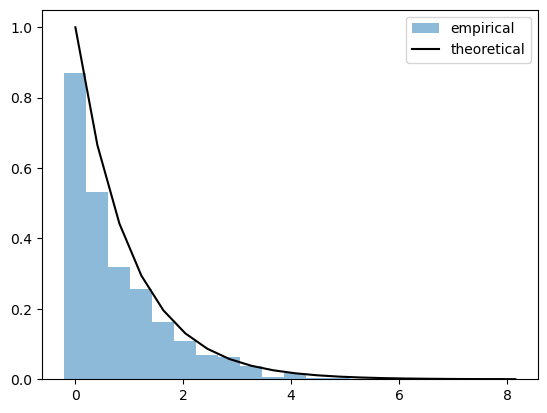

In [14]:
# do an histogram
def count_elements(seq, NBins):
    BInf=np.min(seq)
    BSup=np.max(seq)
    
    δ = (BSup-BInf)/NBins
    bins=np.linspace(BInf, BSup, NBins+1)
    hist,_=np.histogram(seq, bins=bins)
    norm=np.sum(hist) * δ
    return hist,norm,bins,δ #bins gives an array with the mid point in the interval


Nb=20

h1,norm,bins,δ  = count_elements(va,Nb)
#print(h1) # unnormalized
#print(h1/norm) #normalized


x=bins
# plot the normalized histogram
plt.bar(bins[:-1],h1/norm,width=δ ,alpha=0.5,label='empirical')

#theoretical distribution
plt.errorbar(x, f(x,lamb),color='black',label='theoretical')
plt.legend()
plt.show()

4. Repeat the experiment $T=1000$ times and plot the distribution of the average of $X$, and compare with the Gaussian distribution expected.

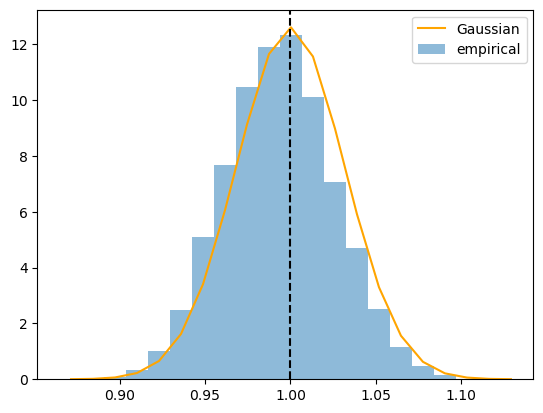

In [15]:
T=10000
N=1000
Results=np.zeros(T)
for t in range(T):
    Results[t]=np.mean(np.random.exponential(1/lamb, N))    

Nb=20
h1,norm,bins,δ  = count_elements(Results, Nb)
x=bins

# Gaussian dist
mu=1/lamb
sigma2=(1/lamb**2)/N
plt.plot(x,gauss(x,mu,sigma2),color='orange',label='Gaussian')

plt.axvline(x=mu,ls='--',color='black')
plt.bar(bins[:-1],h1/norm,width=δ ,alpha=0.5,label='empirical')
plt.legend()
plt.show()